# Capstone Project - The Battle of Neighborhoods in Taipei

In [1]:
import numpy as np 
import pandas as pd 

## Get Taipei Districts from Wiki
Taipei City is divided up into 12 administrative districts

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Taipei')[9]
df

Map             District  \
                                                  Map             Name[97]   
0   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Beitou   
1   Beitou Shilin Neihu Zhongshan Song-shan Datong...  Daan (Da-an, Da'an)   
2   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Datong   
3   Beitou Shilin Neihu Zhongshan Song-shan Datong...    Nangang (Nankang)   
4   Beitou Shilin Neihu Zhongshan Song-shan Datong...                Neihu   
5   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Shilin   
6   Beitou Shilin Neihu Zhongshan Song-shan Datong...             Songshan   
7   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Wanhua   
8   Beitou Shilin Neihu Zhongshan Song-shan Datong...              Wenshan   
9   Beitou Shilin Neihu Zhongshan Song-shan Datong...                Xinyi   
10  Beitou Shilin Neihu Zhongshan Song-shan Datong...            Zhongshan   
11  Beitou Shilin Neihu Zhongshan Song-shan Datong...           Zhongzheng   

                                                     Population(Jan. 2016)  \
   Chinese[98]      Pinyin   Wade–Giles   Pe̍h-ōe-jī Population(Jan. 2016)   
0          北投區      Běitóu     Pei-t'ou      Pak-tâu                257922   
1          大安區       Dà'ān        Ta-an       Tāi-an                312909   
2          大同區      Dàtóng     Ta-t'ung     Tāi-tông                131029   
3          南港區     Nángǎng     Nan-kang     Lâm-káng                122296   
4          內湖區       Nèihú       Nei-hu       Lāi-ô͘                287726   
5          士林區      Shìlín     Shih-lin       Sū-lîm                290682   
6          松山區    Sōngshān    Sung-shan    Siông-san                209689   
7          萬華區      Wànhuá      Wan-hua     Báng-kah                194314   
8          文山區     Wénshān     Wen-shan      Bûn-san                275433   
9          信義區       Xìnyì      Hsin-yi       Sìn-gī                229139   
10         中山區   Zhōngshān   Chung-shan    Tiong-san                231286   
11         中正區  Zhōngzhèng  Chung-cheng  Tiong-chèng                162549   

   Area(km2) Postalcode  
   Area(km2) Postalcode  
0    56.8216        112  
1    11.3614        106  
2     5.6815        103  
3    21.8424        115  
4    31.5787        114  
5    62.3682        111  
6     9.2878        105  
7     8.8522        108  
8    31.5090        116  
9    11.2077        110  
10   13.6821        104  
11    7.6071        100

In [3]:
df.columns = ['Map', 'Name', 'Chinese', 'Pinyin', 'Wade–Giles', 'Pe̍h-ōe-jī', 'Population', 'Area', 'Postalcode']

In [4]:
df.drop("Map", axis=1, inplace=True)
df.drop("Pinyin", axis=1, inplace=True)
df.drop("Wade–Giles", axis=1, inplace=True)
df.drop("Pe̍h-ōe-jī", axis=1, inplace=True)
df

,Name,Chinese,Population,Area,Postalcode
0,Beitou,北投區,257922,56.8216,112
1,"Daan (Da-an, Da'an)",大安區,312909,11.3614,106
2,Datong,大同區,131029,5.6815,103
3,Nangang (Nankang),南港區,122296,21.8424,115
4,Neihu,內湖區,287726,31.5787,114
5,Shilin,士林區,290682,62.3682,111
6,Songshan,松山區,209689,9.2878,105
7,Wanhua,萬華區,194314,8.8522,108
8,Wenshan,文山區,275433,31.5090,116
9,Xinyi,信義區,229139,11.2077,110


## Get Latitude and Longitude

In [5]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="Taipei")

df['Chinese'] = '台北市' + df['Chinese'].astype(str) 
df['Coord']= df['Chinese'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Coord'].apply(pd.Series)
df.drop(['Coord'], axis=1, inplace=True)
df

,Name,Chinese,Population,Area,Postalcode,Latitude,Longitude
0,Beitou,台北市北投區,257922,56.8216,112,25.132419,121.501379
1,"Daan (Da-an, Da'an)",台北市大安區,312909,11.3614,106,25.026515,121.534395
2,Datong,台北市大同區,131029,5.6815,103,25.065986,121.515514
3,Nangang (Nankang),台北市南港區,122296,21.8424,115,25.054578,121.606600
4,Neihu,台北市內湖區,287726,31.5787,114,25.069664,121.588998
5,Shilin,台北市士林區,290682,62.3682,111,25.091840,121.524207
6,Songshan,台北市松山區,209689,9.2878,105,25.049885,121.577272
7,Wanhua,台北市萬華區,194314,8.8522,108,25.031933,121.499332
8,Wenshan,台北市文山區,275433,31.5090,116,24.989786,121.570458
9,Xinyi,台北市信義區,229139,11.2077,110,25.037520,121.563680


## Get coordinates of Taipei

In [6]:
geolocator = Nominatim(user_agent="Taipei")
location = geolocator.geocode('Taipei')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taipei are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Taipei are 25.0375198, 121.5636796.


## Visualize the neighborhoods in Taipei

In [7]:
import folium

# create map of Taipei using latitude and longitude values
map_taipei = folium.Map(location=[latitude, longitude], zoom_start=12)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_taipei) 
    
map_taipei

## Foursquare API

In [8]:
# @hidden_cell
CLIENT_ID = 'YFNY4QEG150E4QHGOWCXPWBHF3RP22MXHGZZ1FH13RNFH3C5' # your Foursquare ID
CLIENT_SECRET = 'SRYD3KV1ZCQOYLJHPJRIVYZUDD5UAZI1RKXXNT2Z3CBIPOQH' # your Foursquare Secret
VERSION = '20200425' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YFNY4QEG150E4QHGOWCXPWBHF3RP22MXHGZZ1FH13RNFH3C5
CLIENT_SECRET:SRYD3KV1ZCQOYLJHPJRIVYZUDD5UAZI1RKXXNT2Z3CBIPOQH


## Get the top 100 venues that are in 'Datong' within a radius of 500 meters

In [9]:
neighborhood_latitude = df.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[2, 'Longitude'] # neighborhood longitude value
neighborhood_name = df.loc[2, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Datong are 25.065986, 121.515514.


In [10]:
import json # library to handle JSON files
import requests # library to handle requests

LIMIT = 100
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section=food&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,賣麵炎仔,Noodle House,25.061110,121.509974
1,Sukiya,Asian Restaurant,25.062829,121.519700
2,好食多涮涮鍋,Hotpot Restaurant,25.065351,121.524559
3,晴光意麵,Food Stand,25.064531,121.522973
4,龍凰號,Asian Restaurant,25.055444,121.514081


In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print ('{} unique categories in {}'.format(nearby_venues['categories'].value_counts().shape[0], neighborhood_name))
print (nearby_venues['categories'].value_counts()[0:10])

100 venues were returned by Foursquare.
32 unique categories in Datong
Chinese Restaurant      12
Taiwanese Restaurant    11
Café                    10
Noodle House             9
Asian Restaurant         7
Japanese Restaurant      7
Hotpot Restaurant        6
Bakery                   4
Ramen Restaurant         4
Seafood Restaurant       3
Name: categories, dtype: int64


## Explore Neighborhoods in Taipei

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section=food&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [15]:
taipei_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Beitou
Daan (Da-an, Da'an)
Datong
Nangang (Nankang)
Neihu
Shilin
Songshan
Wanhua
Wenshan
Xinyi
Zhongshan
Zhongzheng


In [16]:
taipei_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beitou,25.132419,121.501379,金春發牛肉麵,25.137720,121.493171,Asian Restaurant
1,Beitou,25.132419,121.501379,拾米屋 SheMe House,25.136224,121.499005,Café
2,Beitou,25.132419,121.501379,張吳記什錦麵,25.127777,121.500023,Noodle House
3,Beitou,25.132419,121.501379,阿二麻辣旗艦店,25.116681,121.516192,Hotpot Restaurant
4,Beitou,25.132419,121.501379,東方泰國小館,25.114670,121.515385,Thai Restaurant
...,...,...,...,...,...,...,...
1153,Zhongzheng,25.032361,121.518267,Robin's Grill,25.054178,121.524381,Steakhouse
1154,Zhongzheng,25.032361,121.518267,Yong He Soy Milk King (永和豆漿大王),25.029858,121.543424,Chinese Breakfast Place
1155,Zhongzheng,25.032361,121.518267,Orange Shabu Shabu House (橘色涮涮屋),25.038602,121.546190,Shabu-Shabu Restaurant
1156,Zhongzheng,25.032361,121.518267,Kanokwan (老麵攤),25.052861,121.528862,Thai Restaurant


In [17]:
taipei_venues_restaurant = taipei_venues[taipei_venues['Venue Category'].str.contains('Café') == False].reset_index(drop=True)
taipei_venues_restaurant.index = np.arange(1, len(taipei_venues_restaurant)+1)
print(taipei_venues_restaurant['Venue Category'].value_counts())

Taiwanese Restaurant        95
Chinese Restaurant          93
Noodle House                86
Japanese Restaurant         84
Hotpot Restaurant           63
                            ..
Sandwich Place               1
Donut Shop                   1
Moroccan Restaurant          1
Burger Joint                 1
Mediterranean Restaurant     1
Name: Venue Category, Length: 66, dtype: int64


In [18]:
print('There are {} uniques categories.'.format(len(taipei_venues_restaurant['Venue Category'].unique())))

There are 66 uniques categories.


In [19]:
taipei_venues_restaurant.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Beitou,25.132419,121.501379,金春發牛肉麵,25.137720,121.493171,Asian Restaurant
2,Beitou,25.132419,121.501379,張吳記什錦麵,25.127777,121.500023,Noodle House
3,Beitou,25.132419,121.501379,阿二麻辣旗艦店,25.116681,121.516192,Hotpot Restaurant
4,Beitou,25.132419,121.501379,東方泰國小館,25.114670,121.515385,Thai Restaurant
5,Beitou,25.132419,121.501379,阿馬非 Coffee. Pizza.pasta,25.132340,121.497882,Italian Restaurant
6,Beitou,25.132419,121.501379,Sprout初芽,25.119353,121.530761,Salad Place
7,Beitou,25.132419,121.501379,一品山西刀削麵之家,25.118909,121.528256,Chinese Restaurant
8,Beitou,25.132419,121.501379,Din Tai Fung (鼎泰豐),25.105181,121.524876,Dumpling Restaurant
9,Beitou,25.132419,121.501379,蕭記大餛飩,25.116001,121.517358,Chinese Restaurant
10,Beitou,25.132419,121.501379,德州美墨炸雞 Texas Rangers,25.115817,121.528212,Fried Chicken Joint


## Top 10 Frequently Restaurant Categories in Taipei

In [20]:
venues_top10 = taipei_venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
venues_top10 = venues_top10.reset_index()

venues_top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
venues_top10

,Venue_Category,Frequency
0,Taiwanese Restaurant,95
1,Chinese Restaurant,93
2,Noodle House,86
3,Japanese Restaurant,84
4,Hotpot Restaurant,63
5,Bakery,50
6,Dumpling Restaurant,41
7,Asian Restaurant,29
8,Breakfast Spot,28
9,Vegetarian / Vegan Restaurant,28


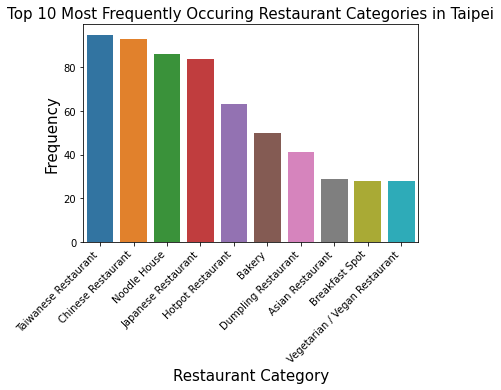

<Figure size 1296x504 with 0 Axes>

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 Most Frequently Occuring Restaurant Categories in Taipei', fontsize=15)
plt.xlabel("Restaurant Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [22]:
grouped_df = taipei_venues_restaurant.groupby("Neighborhood")
grouped_df = grouped_df.agg({"Venue Category": "nunique"})
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('Venue Category', ascending=False)

In [23]:
grouped_df.columns = ['Name', 'Category Count']
grouped_df

,Name,Category Count
5,Shilin,38
10,Zhongshan,36
3,Nangang (Nankang),35
4,Neihu,35
6,Songshan,35
8,Wenshan,35
9,Xinyi,35
7,Wanhua,33
1,"Daan (Da-an, Da'an)",32
11,Zhongzheng,32


In [24]:
geo_df = df[['Name', 'Latitude', 'Longitude']]
geo_df

,Name,Latitude,Longitude
0,Beitou,25.132419,121.501379
1,"Daan (Da-an, Da'an)",25.026515,121.534395
2,Datong,25.065986,121.515514
3,Nangang (Nankang),25.054578,121.606600
4,Neihu,25.069664,121.588998
5,Shilin,25.091840,121.524207
6,Songshan,25.049885,121.577272
7,Wanhua,25.031933,121.499332
8,Wenshan,24.989786,121.570458
9,Xinyi,25.037520,121.563680


In [25]:
res = pd.merge(grouped_df, geo_df, on='Name')
res.reset_index()
res

,Name,Category Count,Latitude,Longitude
0,Shilin,38,25.091840,121.524207
1,Zhongshan,36,25.064361,121.533468
2,Nangang (Nankang),35,25.054578,121.606600
3,Neihu,35,25.069664,121.588998
4,Songshan,35,25.049885,121.577272
5,Wenshan,35,24.989786,121.570458
6,Xinyi,35,25.037520,121.563680
7,Wanhua,33,25.031933,121.499332
8,"Daan (Da-an, Da'an)",32,25.026515,121.534395
9,Zhongzheng,32,25.032361,121.518267


In [26]:
def color(elev): 
    if elev in range(27,30): 
        col = "#FFD0E7"
    elif elev in range(31,34): 
        col = "#FF71B8"
    elif elev in range(35,38): 
        col = "#FF1288"
    elif elev in range(39,42): 
        col = "#B20059"
    elif elev in range(42,45): 
        col = "#620031"
    else: 
        col = "#410021"
    return col 

# create map of Taipei using latitude and longitude values
freq_taipei = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label, elev in zip(res['Latitude'], res['Longitude'], res['Name'], res['Category Count']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color(elev),
        fill=True,
        fill_color=color(elev),
        fill_opacity=1,
        parse_html=False).add_to(freq_taipei) 
    
freq_taipei

## Analyze each neighbor

In [27]:
venues_restaurant = taipei_venues_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x.count())

In [28]:
venues_restaurant_df  = venues_restaurant.to_frame().reset_index()
venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
venues_restaurant_df.index = np.arange(1, len(venues_restaurant_df)+1)
list_rest_no = venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = venues_restaurant_df['Neighborhood'].to_list()

In [29]:
# one hot encoding
onehot = pd.get_dummies(taipei_venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = taipei_venues_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Beijing Restaurant,Bistro,Breakfast Spot,Buffet,...,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Beitou,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beitou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beitou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beitou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,Beitou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
taipei_grouped = onehot.groupby('Neighborhood').mean().reset_index()
taipei_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Beijing Restaurant,Bistro,Breakfast Spot,Buffet,...,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Beitou,0.040000,0.020000,0.000000,0.000000,0.040000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.040000,0.000000,0.020000,0.000000
1,"Daan (Da-an, Da'an)",0.000000,0.000000,0.025974,0.000000,0.090909,0.000000,0.025974,0.051948,0.000000,...,0.000000,0.000000,0.012987,0.000000,0.064935,0.000000,0.012987,0.000000,0.051948,0.012987
2,Datong,0.011111,0.077778,0.000000,0.000000,0.044444,0.000000,0.000000,0.022222,0.011111,...,0.011111,0.011111,0.033333,0.011111,0.122222,0.000000,0.011111,0.000000,0.022222,0.000000
3,Nangang (Nankang),0.011628,0.011628,0.023256,0.000000,0.046512,0.011628,0.000000,0.011628,0.000000,...,0.000000,0.046512,0.034884,0.011628,0.093023,0.000000,0.011628,0.000000,0.023256,0.034884
4,Neihu,0.011905,0.011905,0.035714,0.000000,0.047619,0.000000,0.000000,0.023810,0.011905,...,0.000000,0.023810,0.035714,0.000000,0.071429,0.000000,0.023810,0.000000,0.023810,0.011905
5,Shilin,0.011494,0.034483,0.000000,0.011494,0.011494,0.000000,0.000000,0.034483,0.000000,...,0.011494,0.022989,0.011494,0.000000,0.103448,0.000000,0.045977,0.000000,0.011494,0.000000
6,Songshan,0.023529,0.023529,0.035294,0.000000,0.035294,0.000000,0.011765,0.011765,0.000000,...,0.000000,0.023529,0.035294,0.011765,0.082353,0.011765,0.000000,0.000000,0.023529,0.011765
7,Wanhua,0.011236,0.033708,0.000000,0.000000,0.089888,0.000000,0.011236,0.022472,0.000000,...,0.011236,0.011236,0.022472,0.011236,0.146067,0.000000,0.000000,0.011236,0.033708,0.000000
8,Wenshan,0.000000,0.023529,0.023529,0.011765,0.023529,0.000000,0.011765,0.047059,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.058824,0.000000,0.023529,0.000000,0.023529,0.011765
9,Xinyi,0.000000,0.011628,0.034884,0.000000,0.058140,0.000000,0.023256,0.034884,0.000000,...,0.000000,0.011628,0.023256,0.011628,0.093023,0.011628,0.011628,0.000000,0.046512,0.011628


In [31]:
taipei_grouped.shape

(12, 67)

In [32]:
num_top_venues = 5

for hood in taipei_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = taipei_grouped[taipei_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beitou----
                  venue  freq
0    Chinese Restaurant  0.16
1   Japanese Restaurant  0.06
2  Taiwanese Restaurant  0.06
3    Italian Restaurant  0.06
4  Fast Food Restaurant  0.06


----Daan (Da-an, Da'an)----
                  venue  freq
0    Chinese Restaurant  0.12
1   Japanese Restaurant  0.10
2                Bakery  0.09
3  Taiwanese Restaurant  0.06
4          Noodle House  0.06


----Datong----
                  venue  freq
0    Chinese Restaurant  0.13
1  Taiwanese Restaurant  0.12
2          Noodle House  0.10
3   Japanese Restaurant  0.08
4      Asian Restaurant  0.08


----Nangang (Nankang)----
                  venue  freq
0    Chinese Restaurant  0.10
1          Noodle House  0.10
2   Japanese Restaurant  0.09
3  Taiwanese Restaurant  0.09
4     Hotpot Restaurant  0.06


----Neihu----
                  venue  freq
0          Noodle House  0.11
1   Japanese Restaurant  0.08
2    Chinese Restaurant  0.07
3  Taiwanese Restaurant  0.07
4     Hotpot Restaurant 

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = taipei_grouped['Neighborhood']

for ind in np.arange(taipei_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(taipei_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beitou,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Italian Restaurant,Pizza Place,Noodle House,Dumpling Restaurant,Korean Restaurant,American Restaurant
1,"Daan (Da-an, Da'an)",Chinese Restaurant,Japanese Restaurant,Bakery,Noodle House,Taiwanese Restaurant,Hotpot Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Pizza Place
2,Datong,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Japanese Restaurant,Asian Restaurant,Hotpot Restaurant,Bakery,Ramen Restaurant,Sushi Restaurant,Seafood Restaurant
3,Nangang (Nankang),Noodle House,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Steakhouse,Bakery,Dumpling Restaurant,Vietnamese Restaurant,Sushi Restaurant
4,Neihu,Noodle House,Japanese Restaurant,Chinese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Dumpling Restaurant,Bakery,French Restaurant,Sushi Restaurant,BBQ Joint
5,Shilin,Chinese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Japanese Restaurant,Thai Restaurant,Breakfast Spot,Dumpling Restaurant,Asian Restaurant,French Restaurant,Steakhouse
6,Songshan,Noodle House,Japanese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Chinese Restaurant,Dumpling Restaurant,Bakery,Seafood Restaurant,Sushi Restaurant,BBQ Joint
7,Wanhua,Taiwanese Restaurant,Noodle House,Bakery,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Dumpling Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Food Truck
8,Wenshan,Chinese Restaurant,Japanese Restaurant,Noodle House,Taiwanese Restaurant,Dumpling Restaurant,Breakfast Spot,Italian Restaurant,Fast Food Restaurant,Hotpot Restaurant,BBQ Joint
9,Xinyi,Japanese Restaurant,Noodle House,Hotpot Restaurant,Taiwanese Restaurant,Bakery,Dumpling Restaurant,Vegetarian / Vegan Restaurant,BBQ Joint,Breakfast Spot,Chinese Restaurant


## Cluster Neighborhoods

In [35]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

taipei_grouped_clustering = taipei_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(taipei_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 3, 1, 1, 2, 1, 0, 4, 1], dtype=int32)

In [36]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

taipei_merged = df

taipei_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
taipei_merged = taipei_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

taipei_merged.head() # check the last columns!

,Neighborhood,Chinese,Population,Area,Postalcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beitou,台北市北投區,257922,56.8216,112,25.132419,121.501379,2,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Italian Restaurant,Pizza Place,Noodle House,Dumpling Restaurant,Korean Restaurant,American Restaurant
1,"Daan (Da-an, Da'an)",台北市大安區,312909,11.3614,106,25.026515,121.534395,4,Chinese Restaurant,Japanese Restaurant,Bakery,Noodle House,Taiwanese Restaurant,Hotpot Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Pizza Place
2,Datong,台北市大同區,131029,5.6815,103,25.065986,121.515514,3,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Japanese Restaurant,Asian Restaurant,Hotpot Restaurant,Bakery,Ramen Restaurant,Sushi Restaurant,Seafood Restaurant
3,Nangang (Nankang),台北市南港區,122296,21.8424,115,25.054578,121.606600,1,Noodle House,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Steakhouse,Bakery,Dumpling Restaurant,Vietnamese Restaurant,Sushi Restaurant
4,Neihu,台北市內湖區,287726,31.5787,114,25.069664,121.588998,1,Noodle House,Japanese Restaurant,Chinese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Dumpling Restaurant,Bakery,French Restaurant,Sushi Restaurant,BBQ Joint


In [37]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(taipei_merged['Latitude'], 
                                  taipei_merged['Longitude'], 
                                  taipei_merged['Neighborhood'], 
                                  taipei_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Examine the Clusters

### Cluster 1

In [38]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 0, taipei_merged.columns[[1] + list(range(5, taipei_merged.shape[1]))]]

,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,台北市萬華區,25.031933,121.499332,0,Taiwanese Restaurant,Noodle House,Bakery,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Dumpling Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Food Truck
11,台北市中正區,25.032361,121.518267,0,Taiwanese Restaurant,Noodle House,Chinese Restaurant,Bakery,Japanese Restaurant,Dumpling Restaurant,Hotpot Restaurant,Food Truck,Snack Place,Vegetarian / Vegan Restaurant


### Cluster 2

In [39]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 1, taipei_merged.columns[[1] + list(range(5, taipei_merged.shape[1]))]]

,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,台北市南港區,25.054578,121.606600,1,Noodle House,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Steakhouse,Bakery,Dumpling Restaurant,Vietnamese Restaurant,Sushi Restaurant
4,台北市內湖區,25.069664,121.588998,1,Noodle House,Japanese Restaurant,Chinese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Dumpling Restaurant,Bakery,French Restaurant,Sushi Restaurant,BBQ Joint
6,台北市松山區,25.049885,121.577272,1,Noodle House,Japanese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Chinese Restaurant,Dumpling Restaurant,Bakery,Seafood Restaurant,Sushi Restaurant,BBQ Joint
9,台北市信義區,25.037520,121.563680,1,Japanese Restaurant,Noodle House,Hotpot Restaurant,Taiwanese Restaurant,Bakery,Dumpling Restaurant,Vegetarian / Vegan Restaurant,BBQ Joint,Breakfast Spot,Chinese Restaurant


### Cluster 3

In [40]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 2, taipei_merged.columns[[1] + list(range(5, taipei_merged.shape[1]))]]

,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,台北市北投區,25.132419,121.501379,2,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Italian Restaurant,Pizza Place,Noodle House,Dumpling Restaurant,Korean Restaurant,American Restaurant
5,台北市士林區,25.091840,121.524207,2,Chinese Restaurant,Taiwanese Restaurant,Hotpot Restaurant,Japanese Restaurant,Thai Restaurant,Breakfast Spot,Dumpling Restaurant,Asian Restaurant,French Restaurant,Steakhouse


 ### Cluster 4

In [41]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 3, taipei_merged.columns[[1] + list(range(5, taipei_merged.shape[1]))]]

,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,台北市大同區,25.065986,121.515514,3,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Japanese Restaurant,Asian Restaurant,Hotpot Restaurant,Bakery,Ramen Restaurant,Sushi Restaurant,Seafood Restaurant
10,台北市中山區,25.064361,121.533468,3,Taiwanese Restaurant,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Hotpot Restaurant,Seafood Restaurant,Dumpling Restaurant,Noodle House,Ramen Restaurant,Breakfast Spot


### Cluster 5

In [42]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 4, taipei_merged.columns[[1] + list(range(5, taipei_merged.shape[1]))]]

,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,台北市大安區,25.026515,121.534395,4,Chinese Restaurant,Japanese Restaurant,Bakery,Noodle House,Taiwanese Restaurant,Hotpot Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Pizza Place
8,台北市文山區,24.989786,121.570458,4,Chinese Restaurant,Japanese Restaurant,Noodle House,Taiwanese Restaurant,Dumpling Restaurant,Breakfast Spot,Italian Restaurant,Fast Food Restaurant,Hotpot Restaurant,BBQ Joint
